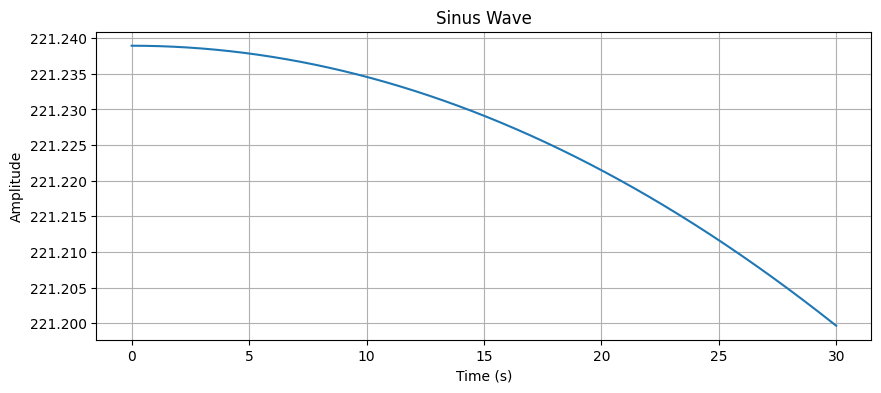

In [24]:
# Commencer avec en input des sinusoides à différentes fréquences.
# On dérive la position, on check si c'est OK
# Ca permet d'avoir le bodeplot + checker si on peut déjà caractériser l'erreur sur l'accélération

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
time_step = 0.005  # Time step in seconds

# Generate a sinus wave
time = np.arange(0, 30, time_step) 

fs = [0, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 1, 10, 25]
f = fs[0]
A = 3
amplitude = np.sin(2*np.pi*f*time) * 3

# Save the combined signal into a CSV file
units = 100/(0.113 * 12)

# Create DataFrame
df_constant = pd.DataFrame({
    'time': time,
    'q1_l': amplitude * units,
    'q1_r': amplitude * units,  
    'q2_l': amplitude * units,
    'q2_r': amplitude * units,
})

# Save to CSV file
csv_filename = f'DC.csv'
df_constant.to_csv(csv_filename, index=False)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(time, amplitude*units)
plt.title('Sinus Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

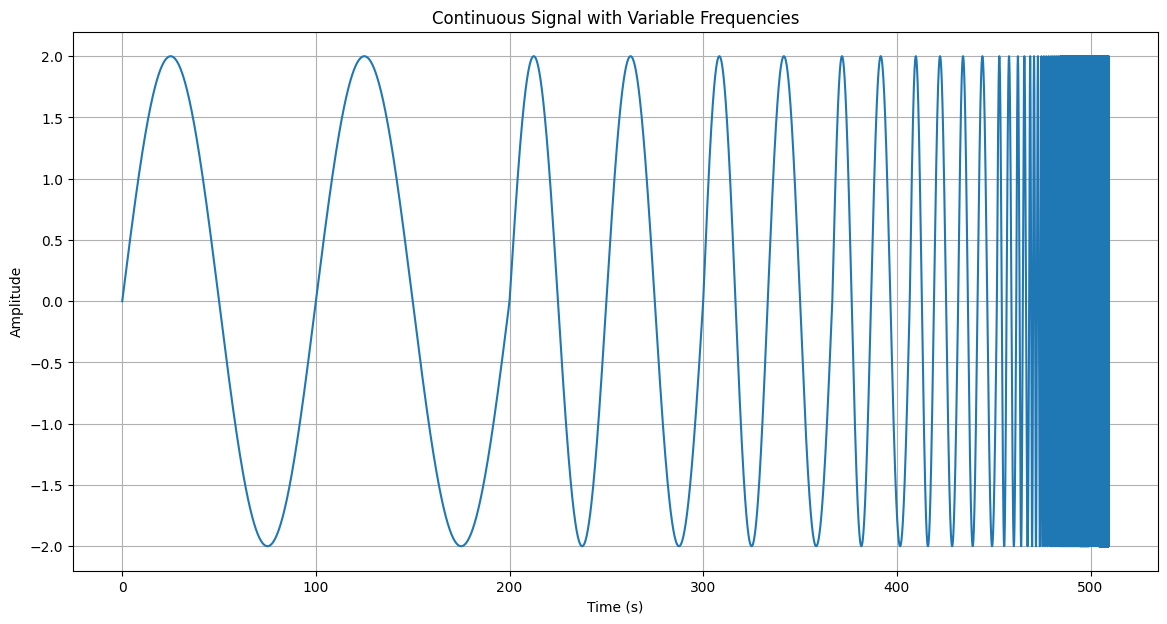

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initial setup
time_step = 0.005  # Time step in seconds
A = 2  # Amplitude of the sinus waves
# frequencies = [0.001, 0.002, 0.003, 0.005, 0.008, 0.01, 0.02, 0.03, 0.05, 0.08, 1, 2, 3, 5, 8, 25]
frequencies = [0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 2, 3, 5, 8, 25]

# Calculate durations for each frequency
durations = []
for f in frequencies:
    period = 1 / f  # Period of the current frequency
    duration_for_2_periods = 2 * period
    duration_for_5_seconds = 5  # Minimum duration of 5 seconds
    # Ensure the duration covers at least two full periods or is at least 5 seconds
    # And adjust to ensure it ends at a zero crossing (full cycle completion)
    duration = max(duration_for_2_periods, duration_for_5_seconds)
    cycles_needed = np.ceil(duration / period)
    adjusted_duration = cycles_needed * period
    durations.append(adjusted_duration)

# Generate the signal
all_times = []
all_amplitudes = []
all_amplitudes_PWM = []
current_time = 0

units = 100/(0.113 * 12)

for f, duration in zip(frequencies, durations):
    segment_time = np.arange(0, duration, time_step)
    segment_amplitude = np.sin(2 * np.pi * f * segment_time) * A
    segment_amplitude_PWM = np.sin(2 * np.pi * f * segment_time) * A * units
    all_times.extend(segment_time + current_time)
    all_amplitudes.extend(segment_amplitude)
    all_amplitudes_PWM.extend(segment_amplitude_PWM)
    current_time += duration

# Create DataFrame
combined_signal = pd.DataFrame({
    'time': all_times,
    'amplitude': all_amplitudes
})


# Create DataFrame
combined_signal_PWM = pd.DataFrame({
    'time': all_times,
    'q1_l': all_amplitudes_PWM,
    'q1_r': all_amplitudes_PWM,
    'q2_l': all_amplitudes_PWM,
    'q2_r': all_amplitudes_PWM
})

# Save to CSV
csv_filename = 'variable_frequency_signal.csv'
combined_signal_PWM.to_csv(csv_filename, index=False)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(combined_signal['time'], combined_signal['amplitude'])
plt.title('Continuous Signal with Variable Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
